<a href="https://colab.research.google.com/github/VictoriaCar/BA820---College-Scorecard-/blob/main/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd

#df = pd.read_csv("/content/drive/MyDrive/BA820 Project/MERGED2022_23_PP.csv")
df = pd.read_csv("MERGED2022_23_PP.csv")
df.head()
df.shape

# If a column has more than 50% missing values --> drop it
missing_values = df.isnull().sum() / len(df) * 100
cols_missing = missing_values[missing_values > 50]
dropped_df = df.drop(columns = cols_missing.index)

print(f"Columns dropped: {len(cols_missing)}")
print(f"New DataFrame shape: {dropped_df.shape}")

<ipython-input-13-bbde9d07bddf>:4: DtypeWarning: Columns (9,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2403,2404,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,3215,3231,3235,3236) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("MERGED2022_23_PP.csv")


Columns dropped: 2355
New DataFrame shape: (6484, 950)


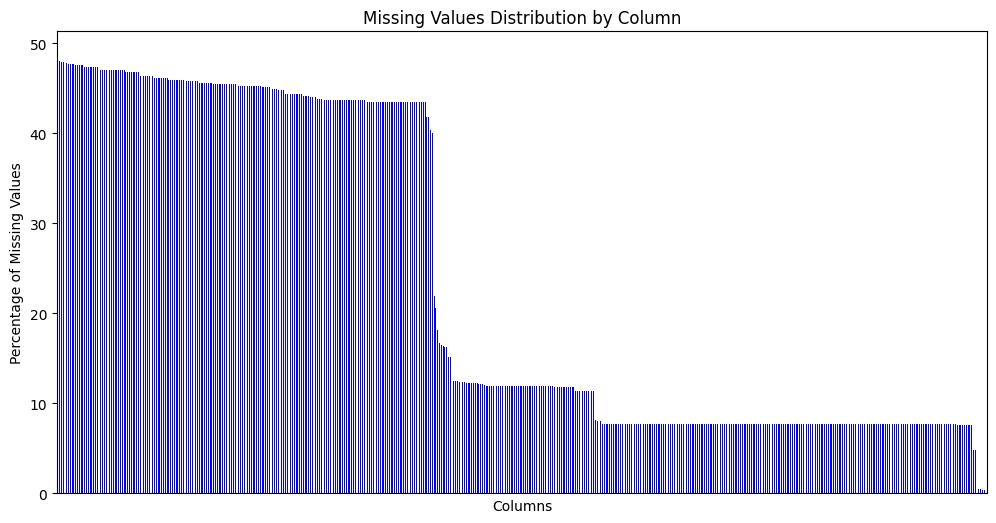

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# To visualize new distribution of missing values of our data
missing_values = dropped_df.isnull().mean() * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
missing_values.plot(kind="bar", color="blue")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Values Distribution by Column")
plt.xticks([])
plt.show()


By looking at the plot we see that we could probably drop all of the columns that have 40-50% missing values. After removing those, the missing value percentage of the columns left drop drastically to around 10%.

In [22]:
# If a column has more than 50% missing values --> drop it
missing_values_updates = dropped_df.isnull().sum() / len(dropped_df) * 100
cols_missing_updates = missing_values_updates[missing_values_updates > 10]
dropped2_df = dropped_df.drop(columns = cols_missing_updates.index)

print(f"Columns dropped: {len(cols_missing_updates)}")
print(f"New DataFrame shape: {dropped2_df.shape}")

Columns dropped: 300
New DataFrame shape: (6484, 650)


In [7]:
dropped2_df.isnull().sum()

,0
UNITID,0
OPEID,26
OPEID6,26
INSTNM,0
CITY,0
...,...
BBRR4_PP_NOMALE_MAKEPROG,0
BBRR4_PP_NOMALE_PAIDINFULL,0
BBRR4_PP_NOMALE_DISCHARGE,0
CONTROL_PEPS,30


In [16]:
#from sklearn.feature_selection import VarianceThreshold

#dropped3_df = dropped2_df.copy()

#df_numeric = dropped3_df.select_dtypes(include=[np.number])

#selector = VarianceThreshold(threshold=0.01)
#df_numeric_reduced = df_numeric[df_numeric.columns[selector.fit(df_numeric).get_support()]]

#dropped3_df = dropped3_df.drop(columns=dropped3_df.columns).join(df_numeric_reduced)

In [18]:
#print(f"New DataFrame shape: {dropped3_df.shape}")


#print(dropped3_df.columns.tolist())


New DataFrame shape: (6484, 650)
['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'ACCREDAGENCY', 'INSTURL', 'NPCURL', 'HCM2', 'MAIN', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'CONTROL', 'ST_FIPS', 'REGION', 'LOCALE', 'LATITUDE', 'LONGITUDE', 'CCBASIC', 'CCUGPROF', 'CCSIZSET', 'HBCU', 'PBI', 'ANNHI', 'TRIBAL', 'AANAPII', 'HSI', 'NANTI', 'MENONLY', 'WOMENONLY', 'CIP01CERT1', 'CIP01CERT2', 'CIP01ASSOC', 'CIP01CERT4', 'CIP01BACHL', 'CIP03CERT1', 'CIP03CERT2', 'CIP03ASSOC', 'CIP03CERT4', 'CIP03BACHL', 'CIP04CERT1', 'CIP04CERT2', 'CIP04ASSOC', 'CIP04CERT4', 'CIP04BACHL', 'CIP05CERT1', 'CIP05CERT2', 'CIP05ASSOC', 'CIP05CERT4', 'CIP05BACHL', 'CIP09CERT1', 'CIP09CERT2', 'CIP09ASSOC', 'CIP09CERT4', 'CIP09BACHL', 'CIP10CERT1', 'CIP10CERT2', 'CIP10ASSOC', 'CIP10CERT4', 'CIP10BACHL', 'CIP11CERT1', 'CIP11CERT2', 'CIP11ASSOC', 'CIP11CERT4', 'CIP11BACHL', 'CIP12CERT1', 'CIP12CERT2', 'CIP12ASSOC', 'CIP12CERT4', 'CIP12BACHL', 'CIP13CERT1', 'CIP13CERT2', 'CIP13ASSOC', 'CIP13CERT4', 'CIP13BACHL

In [43]:
selected_columns = [
    # Institutional Characteristics
    'CONTROL',  # Type of institution control: Public (1), Private nonprofit (2), Private for-profit (3)
    'REGION',  # Geographic region of the institution (e.g., New England, Midwest, etc.)
    'LOCALE',  # Degree of urbanization: City, Suburb, Town, Rural classification
    'CCBASIC',  # Carnegie Classification of the institution's basic category
    'CCUGPROF',  # Carnegie Classification of undergraduate instructional program
    'CCSIZSET',  # Carnegie Classification based on institution size and setting

    # Academic Offerings
    'PREDDEG',  # Predominant degree awarded (Associate's, Bachelor's, etc.)
    'HIGHDEG',  # Highest degree awarded at the institution

    # Financial Information
    'TUITFTE',  # Tuition and fees per full-time equivalent student
    'INEXPFTE',  # Instructional expenses per full-time equivalent student

    # Student Outcomes - Loan Repayment and Default Rates (1-Year Follow-Up)
    'BBRR1_FED_UG_N',  # Number of undergraduate borrowers in federal loan cohort
    'BBRR1_FED_UG_DFLT',  # Number of undergraduate borrowers who defaulted on their loans
    'BBRR1_FED_UG_DLNQ',  # Number of undergraduate borrowers delinquent on their loans
    'BBRR1_FED_UG_FBR',  # Number of undergraduate borrowers in forbearance
    'BBRR1_FED_UG_DFR',  # Number of undergraduate borrowers in deferment
    'BBRR1_FED_UG_NOPROG',  # Number of undergraduate borrowers not making progress on repayment
    'BBRR1_FED_UG_MAKEPROG',  # Number of undergraduate borrowers making progress on repayment
    'BBRR1_FED_UG_PAIDINFULL',  # Number of undergraduate borrowers who paid loans in full
    'BBRR1_FED_UG_DISCHARGE',  # Number of undergraduate borrowers whose loans were discharged

    # Student Outcomes - Loan Repayment and Default Rates (4-Year Follow-Up)
    'BBRR4_FED_UG_N',  # Number of undergraduate borrowers in federal loan cohort (4 years later)
    'BBRR4_FED_UG_DFLT',  # Number of undergraduate borrowers who defaulted on their loans (4 years later)
    'BBRR4_FED_UG_DLNQ',  # Number of undergraduate borrowers delinquent on their loans (4 years later)
    'BBRR4_FED_UG_FBR',  # Number of undergraduate borrowers in forbearance (4 years later)
    'BBRR4_FED_UG_DFR',  # Number of undergraduate borrowers in deferment (4 years later)
    'BBRR4_FED_UG_NOPROG',  # Number of undergraduate borrowers not making progress on repayment (4 years later)
    'BBRR4_FED_UG_MAKEPROG',  # Number of undergraduate borrowers making progress on repayment (4 years later)
    'BBRR4_FED_UG_PAIDINFULL',  # Number of undergraduate borrowers who paid loans in full (4 years later)
    'BBRR4_FED_UG_DISCHARGE',  # Number of undergraduate borrowers whose loans were discharged (4 years later)

    # Diversity & Inclusivity - Minority-Serving Institutions
    #'HBCU',  # Historically Black Colleges and Universities (1 = Yes, 0 = No)
    #'PBI',  # Predominantly Black Institutions (1 = Yes, 0 = No)
    #'ANNHI',  # Alaska Native and Native Hawaiian-Serving Institutions (1 = Yes, 0 = No)
    #'TRIBAL',  # Tribal Colleges and Universities (1 = Yes, 0 = No)
    #'AANAPII',  # Asian American and Native American Pacific Islander-Serving Institutions (1 = Yes, 0 = No)
    #'HSI',  # Hispanic-Serving Institutions (1 = Yes, 0 = No)
    #'NANTI',  # Native American-Serving Non-Tribal Institutions (1 = Yes, 0 = No)

    # Gender-Based Institution Classification
    #'MENONLY',  # Whether the institution only enrolls men (1 = Yes, 0 = No)
    #'WOMENONLY'  # Whether the institution only enrolls women (1 = Yes, 0 = No)
]



filtered_df = dropped2_df[selected_columns]

print(filtered_df.columns.tolist())
print(f"New DataFrame shape: {filtered_df.shape}")


['CONTROL', 'REGION', 'LOCALE', 'CCBASIC', 'CCUGPROF', 'CCSIZSET', 'PREDDEG', 'HIGHDEG', 'TUITFTE', 'INEXPFTE', 'BBRR1_FED_UG_N', 'BBRR1_FED_UG_DFLT', 'BBRR1_FED_UG_DLNQ', 'BBRR1_FED_UG_FBR', 'BBRR1_FED_UG_DFR', 'BBRR1_FED_UG_NOPROG', 'BBRR1_FED_UG_MAKEPROG', 'BBRR1_FED_UG_PAIDINFULL', 'BBRR1_FED_UG_DISCHARGE', 'BBRR4_FED_UG_N', 'BBRR4_FED_UG_DFLT', 'BBRR4_FED_UG_DLNQ', 'BBRR4_FED_UG_FBR', 'BBRR4_FED_UG_DFR', 'BBRR4_FED_UG_NOPROG', 'BBRR4_FED_UG_MAKEPROG', 'BBRR4_FED_UG_PAIDINFULL', 'BBRR4_FED_UG_DISCHARGE']
New DataFrame shape: (6484, 28)


## This is the link to the chat prompt that extracted the columns:
https://chatgpt.com/c/67b1fc08-f6ec-800a-a423-aa1a9c4a5863

In [44]:
filtered_df.isnull().sum()

,0
CONTROL,0
REGION,0
LOCALE,495
CCBASIC,495
CCUGPROF,495
CCSIZSET,495
PREDDEG,0
HIGHDEG,0
TUITFTE,524
INEXPFTE,524


In [45]:
from sklearn.impute import SimpleImputer

columns_to_impute = ['LOCALE', 'CCBASIC', 'CCUGPROF', 'CCSIZSET', 'TUITFTE', 'INEXPFTE']
imputer = SimpleImputer(strategy="mean")
filtered_df[columns_to_impute] = imputer.fit_transform(filtered_df[columns_to_impute])

filtered_df.isnull().sum()


<ipython-input-45-b470e9262638>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[columns_to_impute] = imputer.fit_transform(filtered_df[columns_to_impute])


,0
CONTROL,0
REGION,0
LOCALE,0
CCBASIC,0
CCUGPROF,0
CCSIZSET,0
PREDDEG,0
HIGHDEG,0
TUITFTE,0
INEXPFTE,0


# **Analysis Plan**

The data preparation phase of the project uncovered a more granular insight into the team's data. The team had far too many features (over 5000) and was able to reduce them to under 100, as explained above. Additionally, the team imputed null values as we saw fit (columns with <10% nulls). Finally, the team utilized VarianceThreshold to drop any additional features with a variance <0.01. The team then conducted an in-depth EDA phase to explore how the dataset's features interact and to understand how the data is shaped.

The next step is to perform a detailed analysis of the data, through clustering techniques and dimensionality reduction, with the goal of developing an optimized model to identify colleges that provide the best value for money.

For clustering, the team will now compare K-Means and Hierarchical Clustering and evaluate the performance of the methods using the Silhouette Score to measure cluster cohesion and separation. Dendrogram Analysis will also visualize how clusters merge at different distances. Since the team does not know the optimal number of clusters, they will use the Elbow Method to analyze inertia for different values of k. Additionally, the team will experiment with different linkage methods in hierarchical clustering, including MIN, MAX, and Ward’s Method, to determine the most effective clustering structure. Since K-Means performance depends on initialization, the team will test different initialization techniques to improve clustering quality. The team will implement K-Means++, which aims to improve the quality of the clustering through smarter initializations¹. Additionally, the team will explore the Maxim (Furthest Point Heuristic) Initialization, which has been shown to reduce erroneous clusters from 15% to 6% if there is a need after experimenting with K-Means++².

The team will then move on to the dimensionality reduction stage, utilizing PCA, t-SNE, and UMAP as the primary methods. Since the team discovered the data shape as non-linear, they will primarily focus on t-SNE and UMAP, as PCA is better suited for linear data³. t-SNE is effective at preserving local relationships within the data and has been widely used in high-dimensional clustering applications⁴. However, it does not maintain global structures as well as UMAP, which offers superior computational efficiency and scalability for large datasets⁵. By applying these techniques, the team aims to visualize the data structure and improve clustering results by reducing noise from redundant features.

-------------------------------------------------------------------------------

<small> ¹ GeeksforGeeks. ML | KMEANS++ Algorithm. March 21, 2024. https://www.geeksforgeeks.org/ml-k-means-algorithm/.

<small> ² Fränti, P., & Ieranoja, S. “How Much Can K-Means Be Improved by Using Better Initialization and Repeats?” Pattern Recognition 93 (2019): 95–112. https://www.sciencedirect.com/science/article/pii/S0031320319301608.

<small> ³ Jolliffe, Ian T., and Jorge Cadima. "Principal Component Analysis: A Review and Recent Developments." Philosophical Transactions of the Royal Society A 374, no. 2065 (2016): 20150202. https://doi.org/10.1098/rsta.2015.0202.

<small> ⁴ van der Maaten, Laurens, and Geoffrey Hinton. “Visualizing Data Using t-SNE.” Journal of Machine Learning Research 9 (2008): 2579–2605. https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf.

<small> ⁵ McInnes, Leland, John Healy, and James Melville. "UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction." arXiv preprint arXiv:1802.03426 (2018). https://arxiv.org/abs/1802.03426.
